**[2024-2] CSC4023 Deep Learning (딥러닝입문)**

Exercise 03: Perceptron & Deep Neural Networks

- This network investigates converting neural networks to matrix form.
- Work through the cells below, running each cell in turn.
- Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.


# Perceptron
- Digit classification with perceptron
- We would like to use the perceptron algorithm to classify digit 0 and digit 1 in the training set

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# MNIST 데이터셋 로드 (PyTorch 사용)
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# '0'과 '1'만 필터링
data_0_indices = torch.where(mnist_train.targets == 0)[0]
data_1_indices = torch.where(mnist_train.targets == 1)[0]

# 숫자 '0'에 해당하는 이미지 및 레이블
data0 = mnist_train.data[data_0_indices].numpy()  # 텐서를 numpy로 변환
# 숫자 '1'에 해당하는 이미지 및 레이블
data1 = mnist_train.data[data_1_indices].numpy()  # 텐서를 numpy로 변환

# 1000개씩 선택
data0 = data0[:1000]
data1 = data1[:1000]

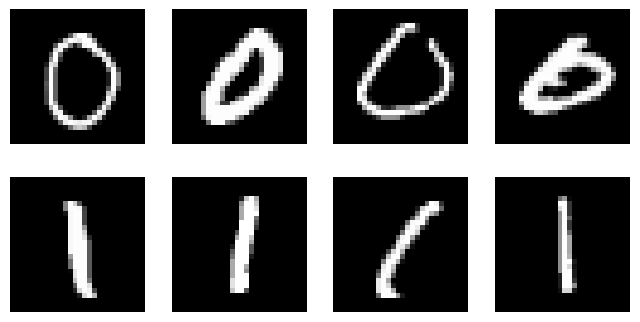

In [2]:
# 이미지 시각화
plt.figure(figsize=(8, 4))
plt.subplot(2, 4, 1), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 2), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 3), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 4), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 5), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 6), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 7), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2, 4, 8), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.show()

- We will use two features:

  (1) the average of central region

  (2) the average of total region

In [3]:
# 이진화 - 픽셀 값을 125 이상이면 1, 아니면 0으로 변환
data0 = data0 > 125
data1 = data1 > 125

# 이미지 중앙의 픽셀 값 평균 계산 (10x10 크기)
feature0_1 = np.sum(data0[:, 10:20, 10:20], axis=(1, 2)).reshape(-1, 1) / 100
feature1_1 = np.sum(data1[:, 10:20, 10:20], axis=(1, 2)).reshape(-1, 1) / 100

# 전체 이미지의 픽셀 값 평균 계산 (28x28 크기)
feature0_2 = np.sum(data0, axis=(1, 2)).reshape(-1, 1) / (28 * 28)
feature1_2 = np.sum(data1, axis=(1, 2)).reshape(-1, 1) / (28 * 28)

# 결과 출력
print("Feature0_1 (중앙 영역 평균):", feature0_1[:5])  # '0' 클래스의 중앙 영역 픽셀 평균
print("Feature1_1 (중앙 영역 평균):", feature1_1[:5])  # '1' 클래스의 중앙 영역 픽셀 평균
print("Feature0_2 (전체 영역 평균):", feature0_2[:5])  # '0' 클래스의 전체 영역 픽셀 평균
print("Feature1_2 (전체 영역 평균):", feature1_2[:5])  # '1' 클래스의 전체 영역 픽셀 평균

Feature0_1 (중앙 영역 평균): [[0.17]
 [0.23]
 [0.63]
 [0.55]
 [0.22]]
Feature1_1 (중앙 영역 평균): [[0.36]
 [0.35]
 [0.26]
 [0.2 ]
 [0.37]]
Feature0_2 (전체 영역 평균): [[0.15943878]
 [0.16964286]
 [0.17729592]
 [0.19132653]
 [0.22066327]]
Feature1_2 (전체 영역 평균): [[0.08673469]
 [0.08545918]
 [0.05739796]
 [0.05229592]
 [0.08290816]]


In [4]:
# Step 1: 특징 데이터를 결합 (bias term 1 추가) 하여 최종 입력 행렬 X, y 생성
X0 = np.hstack([np.ones([data0.shape[0], 1]), feature0_1, feature0_2])
X1 = np.hstack([np.ones([data1.shape[0], 1]), feature1_1, feature1_2])
X = np.vstack([X0, X1])
X = np.asmatrix(X)

y = np.vstack([np.ones([1000, 1]), -np.ones([1000, 1])])
y = np.asmatrix(y)

# Step 2: 행렬 X, y의 크기 확인 (2000, 3), (2000, 1)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 결과 예시 출력 (상위 5개 데이터)
print("First 5 rows of X:\n", X[:5])
print("Last 5 rows of X:\n", X[-5:])

Shape of X: (2000, 3)
Shape of y: (2000, 1)
First 5 rows of X:
 [[1.         0.17       0.15943878]
 [1.         0.23       0.16964286]
 [1.         0.63       0.17729592]
 [1.         0.55       0.19132653]
 [1.         0.22       0.22066327]]
Last 5 rows of X:
 [[1.         0.38       0.08418367]
 [1.         0.24       0.05867347]
 [1.         0.3        0.07015306]
 [1.         0.53       0.12882653]
 [1.         0.29       0.06760204]]


- 2D plot으로 숫자 0과 1의 특징값을 plot하세요. (가로 축: feature 1, 세로 축: feature 2)
- 다음과 같은 그림이 출력되어야 합니다.

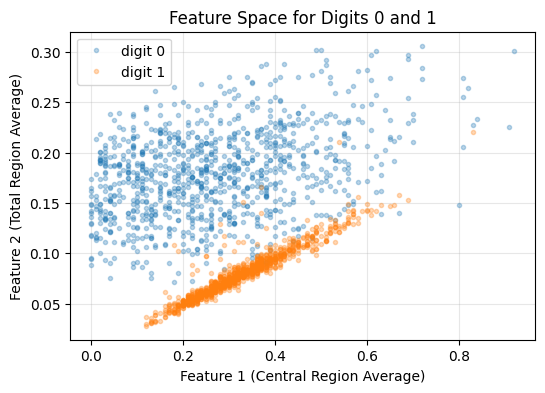

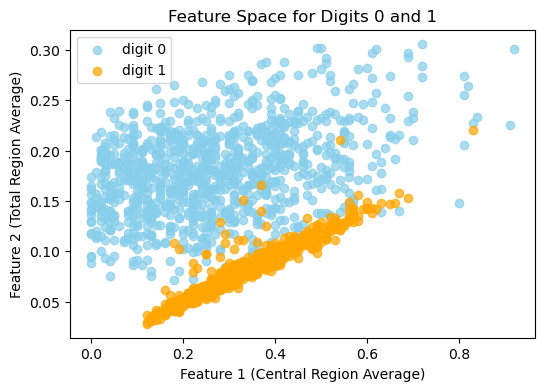

In [5]:
###############################################################################
# TODO: 아래를 구현하세요.
plt.figure(figsize=(6, 4))

# 특징 공간에서 모든 숫자 '0'과 '1'의 특징 (bias를 제외한) 을 플로팅 (plot)

# Plot digit 0 data points (blue)
plt.scatter(feature0_1, feature0_2, c='skyblue', label='digit 0', alpha=0.7)

# Plot digit 1 data points (orange)
plt.scatter(feature1_1, feature1_2, c='orange', label='digit 1', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel("Feature 1 (Central Region Average)")
plt.ylabel("Feature 2 (Total Region Average)")
plt.title("Feature Space for Digits 0 and 1")
plt.legend()

###############################################################################
# 그래프 출력
plt.show()

**[perceptron algorithm]**

Step 1. Initialization
- First initialize  ω . We usually set  ω  to a zero vector as an initial guess.

Step 2. Update $\omega$

- We update $\omega$  when the prediction is wrong. The update rule is the following:  

$$
\omega \leftarrow \omega + y \cdot x
$$

- We will repeat the iteration `max_iters` times. At each iteration, we try to update weights **50** times as long as the randomly picked data point is misclassified. This is to accelerate the training procedure.

- Here is a pseudo code: (예시일 뿐 다르게 구현하는 것도 가능)

  ```pseudo
  For k = 1:max_iters {
      compute misclassified points

      for j = 1:50 {
        i = randomly picked misclassified points
        w = w + y(i)x(i)
      }
  }



In [6]:
###############################################################################
# TODO: 아래를 구현하세요.

# Step 1: Initialize w

learning_rate = 1.0
def initialize_weights(dim):
    return np.zeros((dim, 1))

# 퍼셉트론 예측 함수
def predict(X, w):
    return np.sign(np.dot(X, w))



# Step 2: Update w

def perceptron_train(X, y, max_iters=1500, updates_per_iter=50):
    """
    max_iters: 최대 반복 횟수
    updates_per_iter: 반복 당 업데이트 수행 횟수 (무작위 오류 샘플 사용)
    """
    n_samples, n_features = X.shape
    w = initialize_weights(n_features)  # 가중치 초기화

    for k in range(max_iters):
        # Step 2.1: 오류가 있는 데이터 찾기
        y_hat = predict(X, w)
        misclassified_indices = np.where(y != y_hat)[0]  # 예측 오류 인덱스

        if len(misclassified_indices) == 0:
            print(f"학습이 {k} 번째 반복에서 완료되었습니다.")
            break  # 모든 데이터가 올바르게 분류된 경우 학습 종료


        # Step 2.2: 무작위로 오류 데이터 선택하여 가중치 업데이트
        for j in range(updates_per_iter):
            if len(misclassified_indices) > 0:
                i = np.random.choice(misclassified_indices)  # 무작위 선택
                # X[i]의 차원을 (3, 1)로 변경해 가중치와 곱셈이 가능하도록 수정
                w += learning_rate * y[i, 0] * X[i].T  # 가중치 업데이트
            else:
                print("더 이상 잘못 분류된 포인트가 없습니다.")
                break

    return w


# 퍼셉트론 학습 수행
w = perceptron_train(X, y, max_iters=1500, updates_per_iter=50)

###############################################################################

Step 3. Plot the results

You are asked to plot two graphs.

1. **First plot**: Plot the **number of wrong predictions** with respect to every \( k \)-th iteration.
- 예시 이미지: (`max_iters` = 1500일 때)

    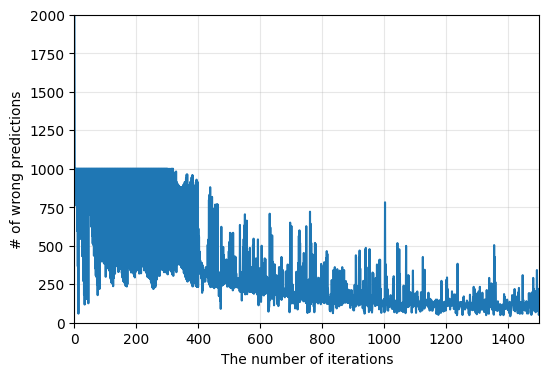


2. **Second plot**: Plot the classifier (decision boundary). Note that the decision boundary is given by the following equation:

$$
\omega_0 + \omega_1 x_1 + \omega_2 x_2 = 0
$$

  - 예시 이미지:

  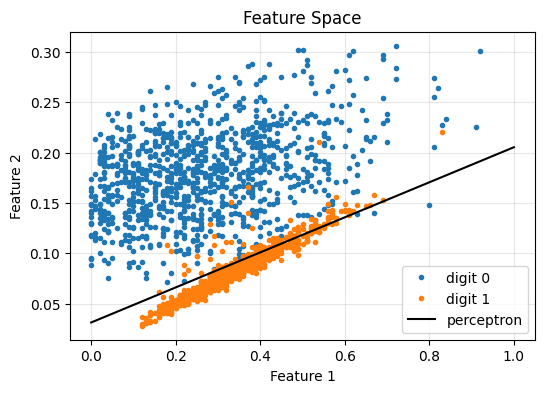


<Figure size 600x400 with 0 Axes>

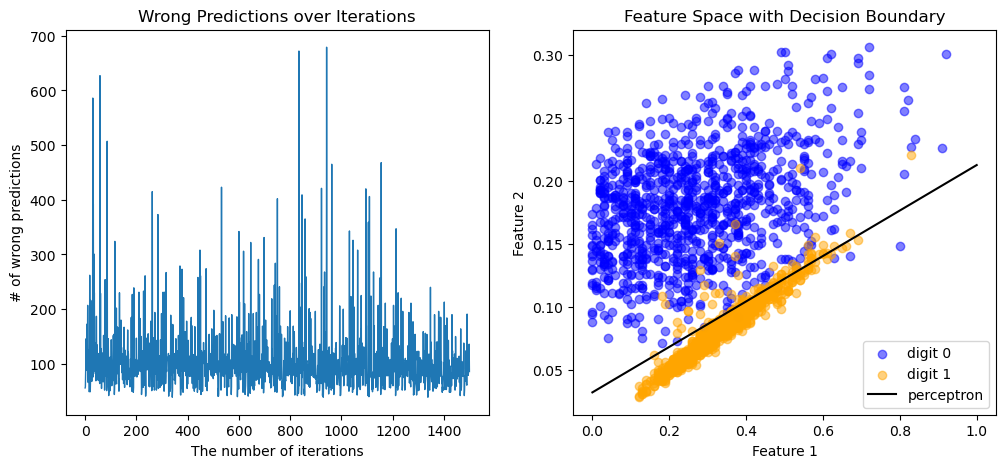

In [7]:
###############################################################################
# TODO: 아래를 구현하세요:
plt.figure(figsize = (6, 4))

# first plot: wrong prediction numbers

wrong_predictions = []  # 각 반복에서의 잘못된 예측 수를 저장
max_iters = 1500
for k in range(max_iters):
    # 잘못 분류된 데이터 포인트 계산
    misclassified_indices = []
    for i in range(X.shape[0]):
        if np.sign(X[i] @ w)[0, 0] != y[i, 0]:
            misclassified_indices.append(i)

    # 잘못된 예측 수 저장
    wrong_predictions.append(len(misclassified_indices))

    # 50개의 무작위 잘못 분류된 데이터 포인트에 대해 가중치 업데이트
    for j in range(50):
        if misclassified_indices:
            i = np.random.choice(misclassified_indices)
            w += learning_rate * y[i, 0] * X[i].T

# 그래프 1: 잘못된 예측 수 vs 반복 횟수
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(wrong_predictions, linewidth=1)
plt.xlabel('The number of iterations')
plt.ylabel('# of wrong predictions')
plt.title('Wrong Predictions over Iterations')


# second plot: decision boundary and entire data points
# decision boundary (x1의 범위는 0부터 1로 가정)

plt.subplot(1, 2, 2)

# 1차원 배열로 변환
X_feature1 = np.array(X[:1000, 1]).flatten()
X_feature2 = np.array(X[:1000, 2]).flatten()
X_feature1_digit1 = np.array(X[1000:, 1]).flatten()
X_feature2_digit1 = np.array(X[1000:, 2]).flatten()

# 클래스 0과 1에 대한 데이터 포인트 플로팅
plt.scatter(X_feature1, X_feature2, color='blue', alpha=0.5, label='digit 0')
plt.scatter(X_feature1_digit1, X_feature2_digit1, color='orange', alpha=0.5, label='digit 1')

# 결정 경계 플로팅 (x1의 범위는 0부터 1로 가정)
x1 = np.linspace(0, 1, 100)
x2 = -(w[0] + w[1] * x1) / w[2]
plt.plot(x1, x2, color='black', label='perceptron')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Feature Space with Decision Boundary')


###############################################################################
plt.show()

# Deep Neural Network

In [8]:
# Imports numpy library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [9]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

Define a shallow neural network with, `one input, one output, and three hidden` units

In [10]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [11]:
# Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()


Let's define a network. We'll just consider the inputs and outputs over the range [-1,1].

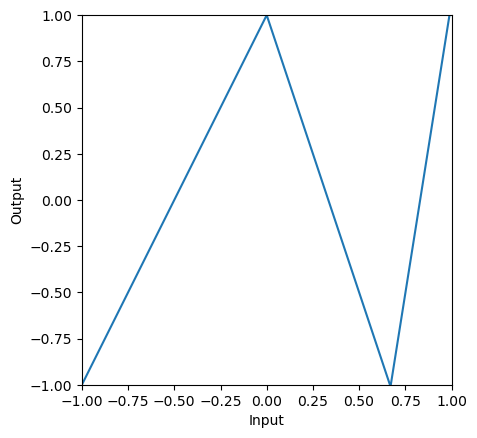

In [12]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

Step 1: define the same network in "matrix form"

- Now we'll define the same neural network, but this time, we will use **matrix form**. When you get this right, it will draw the **same plot** as above.

  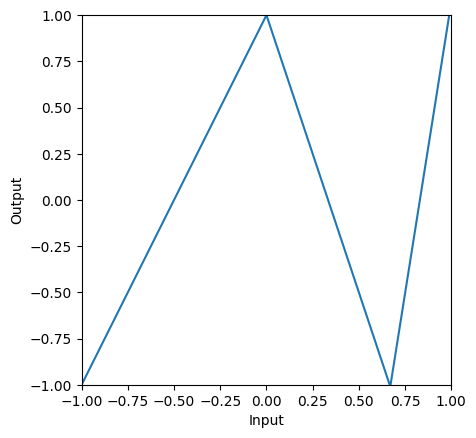

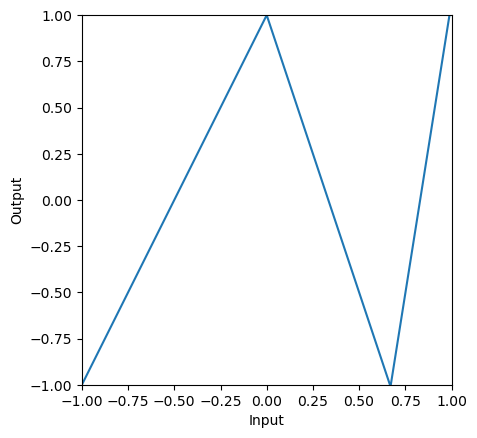

In [13]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))

###############################################################################
# TODO: 아래를 구현하세요.
# 1. Fill in the values of the beta and Omega matrices with the n1_theta and n1_phi parameters that define the network above
# 첫 번째 행과 첫 번째 열에 있는 요소를 a[0,0]으로 참조하세요.

beta_0[0,0] = n1_theta_10   # 첫 번째 유닛의 편향
Omega_0[0,0] = n1_theta_11  # 첫 번째 유닛의 가중치



# 두번째, 세번째 유닛 편향/가중치 설정

beta_0[1, 0] = n1_theta_20   # Bias for the second unit
Omega_0[1, 0] = n1_theta_21  # Weight for the second unit

beta_0[2, 0] = n1_theta_30   # Bias for the third unit
Omega_0[2, 0] = n1_theta_31  # Weight for the third unit

# 2. output layer weights (phi values) 구현: beta_1, Omega_1

beta_1[0, 0] = n1_phi_0  # Bias for the output layer

Omega_1[0, 0] = n1_phi_1  # Weight from first hidden unit to output
Omega_1[0, 1] = n1_phi_2  # Weight from second hidden unit to output
Omega_1[0, 2] = n1_phi_3  # Weight from third hidden unit to output

###############################################################################

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
n1_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

- Now we'll feed the output of the first network into the second one, and see what the outputs look like.

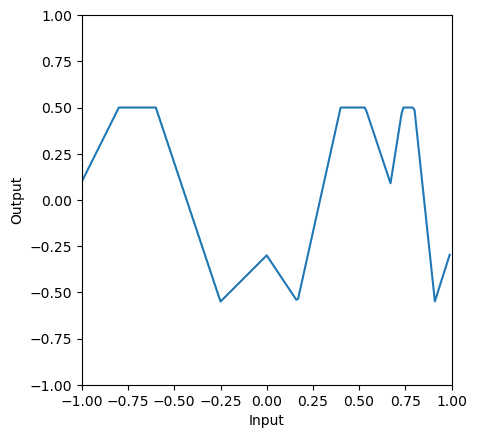

In [14]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

Step 2: define the composition of the two networks in "matrix form"

- Now, define the compotision of the networks using **mastrix form**. It will draw the same plot above.

  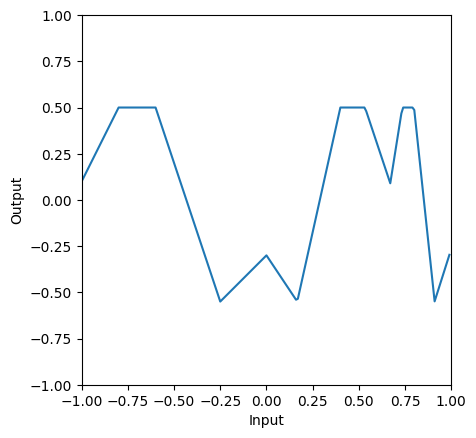

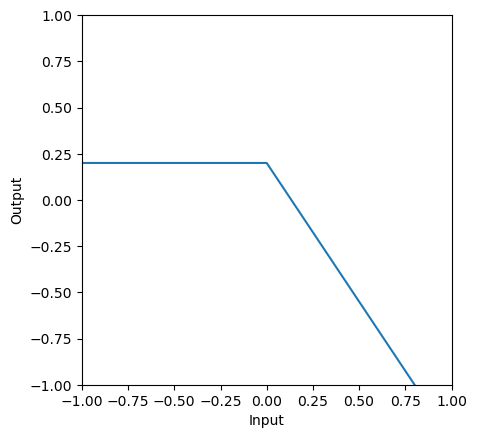

In [15]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

###############################################################################
# Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# 첫 번째 행과 첫 번째 열에 있는 요소를 a[0,0]으로 참조하세요.
# that define the composition of the two networks above (see eqn 4.5 for Omega1 and beta1 albeit in different notation)

# TODO:  아래를 구현하세요.
# 1. Fill in the values of the beta and Omega matrices: beta_0, Omega_0

beta_0[0, 0] = n1_theta_10
Omega_0[0, 0] = n1_theta_11

beta_0[1, 0] = n1_theta_20
Omega_0[1, 0] = n1_theta_21

beta_0[2, 0] = n1_theta_30
Omega_0[2, 0] = n1_theta_31

# 2. Second layer (composition of first and second networks): beta_1, Omega_1

beta_1[0, 0] = n2_theta_10
Omega_1[0, 0] = n2_theta_11

beta_1[1, 0] = n2_theta_20
Omega_1[1, 1] = n2_theta_21

beta_1[2, 0] = n2_theta_30
Omega_1[2, 2] = n2_theta_31

# 3. Output layer: beta_2, Omega_2

beta_2[0, 0] = n2_phi_0

Omega_2[0, 0] = n2_phi_1
Omega_2[0, 1] = n2_phi_2
Omega_2[0, 2] = n2_phi_3

###############################################################################

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
h2 = ReLU(np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1))
n1_out = np.matmul(beta_2,np.ones((1,n_data))) + np.matmul(Omega_2,h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)

Step 3: make **a deep network with 3 hidden layers**

- Now let's make a deep network with 3 hidden layers.

- It will have $D_i = 4$ inputs, $D_1 = 5$ neurons in the first layer, $D_2 = 2$ neurons in the second layer and $D_3 = 4$ neurons in the third layer, and $D_o = 1$ output.

In [16]:
# define sizes
D_i = 4  # 입력 차원
D_1 = 5  # 첫 번째 은닉층 차원
D_2 = 2  # 두 번째 은닉층 차원
D_3 = 4  # 세 번째 은닉층 차원
D_o = 1  # 출력 차원
n_data = 4  # 데이터 포인트 수

# 입력 데이터 설정
x = np.random.normal(size=(D_i, n_data))

###############################################################################
# TODO:  아래를 구현하세요.
# 1. 파라미터를 올바른 크기로 초기화: random normal 값으로 초기화: beta_0, Omega_0, beta_1, Omega_1, beta_2, Omega_2, beta_3, Omega_3
# 첫번째/두번째/세번째 은닉층 편향 및 가중치, 출력층 편향 및 가중치

# Initialize parameters using random normal values
beta_0 = np.random.normal(size=(D_1, 1))  # Bias for 1st hidden layer
Omega_0 = np.random.normal(size=(D_1, D_i))  # Weights for 1st hidden layer

beta_1 = np.random.normal(size=(D_2, 1))  # Bias for 2nd hidden layer
Omega_1 = np.random.normal(size=(D_2, D_1))  # Weights for 2nd hidden layer

beta_2 = np.random.normal(size=(D_3, 1))  # Bias for 3rd hidden layer
Omega_2 = np.random.normal(size=(D_3, D_2))  # Weights for 3rd hidden layer

beta_3 = np.random.normal(size=(D_o, 1))  # Bias for output layer
Omega_3 = np.random.normal(size=(D_o, D_3))  # Weights for output layer


def ReLU(x):
    return np.maximum(0, x)

# Forward pass
h1 = ReLU(np.matmul(Omega_0, x) + beta_0)  # 1st hidden layer
h2 = ReLU(np.matmul(Omega_1, h1) + beta_1)  # 2nd hidden layer
h3 = ReLU(np.matmul(Omega_2, h2) + beta_2)  # 3rd hidden layer
y = np.matmul(Omega_3, h3) + beta_3  # Output layer (no ReLU)

print("Output:\n", y)


###############################################################################

Output:
 [[-1.38389182 -1.38389182 -1.38389182 -1.38389182]]


In [17]:
# If you set the parameters to the correct sizes, the following code will run

h1 = ReLU(np.matmul(Omega_0, x) + beta_0)
h2 = ReLU(np.matmul(Omega_1, h1) + beta_1)
h3 = ReLU(np.matmul(Omega_2, h2) + beta_2)
y = np.matmul(Omega_3, h3) + beta_3

if h1.shape[0] is not D_1 or h1.shape[1] is not n_data:
    print("h1 is wrong shape")
if h2.shape[0] is not D_2 or h1.shape[1] is not n_data:
    print("h2 is wrong shape")
if h3.shape[0] is not D_3 or h1.shape[1] is not n_data:
    print("h3 is wrong shape")
if y.shape[0] is not D_o or h1.shape[1] is not n_data:
    print("Output is wrong shape")


- print the inputs and outputs:
- 예시 결과:
  ```
  Input data points
  [[ 1.34024976  0.41879758 -0.26587053 -0.93583032]
  [-1.00174719  0.46395467 -0.31706699 -1.3962852 ]
  [ 0.73009711  0.60224886 -0.9939715  -0.26709495]
  [ 0.10718823  0.48610873 -0.05073769  0.73361066]]
  Output data points
  [[-3.99803157 -1.60348371  5.28474715 -1.34001085]]
  ```

In [18]:
# Print the inputs and outputs
print("Input data points")
print(x)
print ("Output data points")
print(y)

Input data points
[[-0.45268623 -1.56029556 -0.54773734 -1.23973774]
 [ 0.47092988 -0.23446599  0.77913195  0.16210657]
 [-0.78859881 -2.30067788 -1.22146625 -1.36760384]
 [ 0.42133922  0.56144266  0.19993642 -0.39562963]]
Output data points
[[-1.38389182 -1.38389182 -1.38389182 -1.38389182]]
